<a href="https://colab.research.google.com/github/yashyaks/compute_tasks/blob/main/Task_6/Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/yashyaks/compute_tasks/main/Task_6/churndata_processed.csv')
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   months                     7043 non-null   float64
 1   multiple                   7043 non-null   int64  
 2   gb_mon                     7043 non-null   float64
 3   security                   7043 non-null   int64  
 4   backup                     7043 non-null   int64  
 5   protection                 7043 non-null   int64  
 6   support                    7043 non-null   int64  
 7   unlimited                  7043 non-null   int64  
 8   contract                   7043 non-null   float64
 9   paperless                  7043 non-null   int64  
 10  monthly                    7043 non-null   float64
 11  satisfaction               7043 non-null   float64
 12  churn_value                7043 non-null   int64  
 13  payment_Credit Card        7043 non-null   int64

In [28]:
features = df1.drop(['churn_value'],axis=1).values
target = df['churn_value']

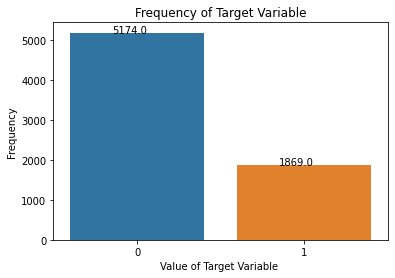

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
f = sns.countplot(x = target)

plt.title('Frequency of Target Variable')
plt.xlabel('Value of Target Variable ')
plt.ylabel('Frequency')

for i in f.patches:
   f.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))

plt.show()

IMBALANCED DATASET

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.utils import resample

In [22]:
dfmajority=df[df['churn_value']==0]
dfminority=df[df['churn_value']==1]
dfsampled=resample(dfminority,replace=True,n_samples=5174,random_state=50)

In [25]:
df1=pd.concat([dfsampled,dfmajority])

In [24]:
df1['churn_value'].value_counts()

1    5174
0    5174
Name: churn_value, dtype: int64

In [30]:
x=df1.drop(['churn_value'],axis=1).values
y=df1.loc[:,'churn_value'].values
x

array([[1.        , 1.        , 0.83529412, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.03529412, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.17647059, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.69411765, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.12941176, ..., 0.        , 0.        ,
        0.        ]])

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=69)

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

estimator_range=np.arange(5,50,1)
model = []
score = []
for n_estimators in estimator_range:


    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators = n_estimators, random_state = 69)


    clf.fit(x_train, y_train)

    # Append the model and score to their respective list
    model.append(clf)
    score.append(accuracy_score(y_true = y_test, y_pred = clf.predict(x_test)))

In [38]:
max(score)

0.9753623188405797

In [39]:
y_pred=clf.predict(x_train)
accuracy_score(y_train,y_pred)

0.9990335829910606